# THE SYRIATEL CUSTOMER CHURN ANALYSIS

## 1.0 BUSINESS UNDERSTANDING


### 1.1 Business Overview
Customer churn is the process where clients discontinue their relationship with a company or brand. In the telecom sector, this occurs when subscribers cancel their services with one provider and either switch to a competitor or stop using the service entirely. To combat rising churn and growing competition, an insight by [Mckinsey $ Company](https://www.mckinsey.com/industries/technology-media-and-telecommunications/our-insights/reducing-churn-in-telecom-through-advanced-analytics) urges telecoms to capitalize on analytical insights immediately.

Also a [2024 study by Alisha Sikri and colleagues](https://www.nature.com/articles/s41598-024-63750-0) research article, published in Scientific Reports emphasizes the significance of retaining existing customers over acquiring new ones. This project aims to predict potential churners, by leveraging machine learning algorithms allowing telecom companies to implement effective retention strategies.

### 1.2 Business Problem
SyriaTel faces the issue of customer churn, where subscribers cancel their services or switch to competitors. High churn rates can result in significant revenue loss, increased costs to attract new customers, and reduced market share. The company needs to understand which customers are at risk of leaving and identify patterns in their behavior to mitigate these losses effectively.

#### 1.3 Business Objectives

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

 - To analyze the impact of customer demographics  on churn.

 - To examine the effect of account details  on churn.

 - To assess how subscription plans influence churn.

 - To explore how customer service call frequency relates to churn.

 - To Develop a predictive model to identify customers at risk of churning based on these factors.
 

Key Questions

1. How do customer demographics  affect churn?

2. How do account details  influence churn?

3. How do subscription plans impact churn?

4. How does the frequency of customer service calls relate to churn?

5. Can a predictive model accurately identify customers at risk of churning based on these factors?

### 1.4 Success criteria
1. A reliable classification model that can correctly predict customer churn and provide actionable insights for SyriaTel.

2. The model identifies the most important features that explain why customers churn.

3. The findings can be translated into clear, recommendations that SyriaTel can act on to reduce churn.

## 2.0 DATA UNDERSTANDING

The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (False) or remained (True).


### 2.1 Load Dataset
1. Import necessary libraries.
2. Load dataset

In [1]:
# Import necessary libraries

# Data loading and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc, RocCurveDisplay

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load dataset 
data = pd.read_csv(r"C:\Users\USER\Desktop\Phase_3\Group_9_Phase_3_project\data\bigml_59c28831336c6604c800002a.csv")
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.2 Dataset Overview

In [3]:
# Summary information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3,333 rows which represent the customers. The data set has 21 columns which are both numeric e.g `total minutes, charges, account length` and categorical e.g `international plan, voicemail plan`. Our Target variable is `churn` column which is boolen.

In [4]:
# Checking for the no. of columns and rows
data.shape

(3333, 21)

In [5]:
# Display the numerical and categorical columns
print(f"Numerical columns: {data.select_dtypes(include = 'number').columns}\n")
print(f"Categorical columns: {data.select_dtypes(include = 'object').columns}\n")

Numerical columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')



In [6]:
# Checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
# Check for duplicate values
data.duplicated().sum()

0

In [8]:
# Statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 3.0 DATA PREPARATION
In this section, we will look into data cleaning, Exploratory Data Analysis (EDA) and data preprocessing for our dataset.

### 3.1 Data Cleaning
Data cleaning is a crucial step to prepare the dataset for reliable analysis and modeling. The goal is to remove inconsistencies, handle missing, handle duplicate values, and standardize formats so that the data is accurate, consistent and ready for further exploration.

#### 3.1.1 Dropping Irrelevant Features

We begin by dropping `phone number` since it is a unique identifier so it does not carry predictive information about whether a customer will churn or not.

In [9]:
# Drop unecessary columns
# Drop the phone_number column

data = data.drop(columns = ["phone number"])

data.shape # Check the dataset shape after dropping the column

(3333, 20)

#### 3.1.2 Validation of categorical columns

To validate the dataset, the unique values of categorical columns were examined. This step ensures that categories contain only expected and consistent entries.

In [10]:
# Checking for unique values in categorical columns
categorical_cols = data.select_dtypes(include = "object").columns
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}\n")


state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

international plan: ['no' 'yes']

voice mail plan: ['yes' 'no']



`state` values were confirmed to be valid 2-letter state abbreviations. `international plan` values, were consistent with only "yes" and "no". `voice mail plan`  values, were also consistent with only "yes" and "no".

#### 3.1.3 Standardizing Categorical Values

To ensure consistency, we standardize the text in categorical columns by converting them to lowercase and removing any leading or trailing spaces. 

In [11]:
# Ensure uniformity in categorical columns - remove extra spaces, lowercase

data['international plan'] = data['international plan'].str.lower().str.strip()
data['voice mail plan'] = data['voice mail plan'].str.lower().str.strip()

# Standardize state codes - remove extra spaces, uppercase
data['state'] = data['state'].str.upper().str.strip()

for col in categorical_cols:
    print(f"{col}: {data[col].unique()}\n")

state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

international plan: ['no' 'yes']

voice mail plan: ['yes' 'no']



#### 3.1.4 Standardizing Column Names

We reformat the column names for better readability and to make them easier to work with in code by converting them to lowercase and replacing spaces with underscores.

In [12]:
# Convert spaces to underscores and lowercase.
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print(data.columns)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


#### 3.1.5 Handling missing values

We check for missing values in the dataset.

In [13]:
# Check for missing values
data.isnull().sum()

state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

No missing values in the dataset hence no need to handle any missing values.

#### 3.1.6 Checking duplicates

We check for and remove any completely identical duplicate rows to prevent them from influencing the model training.

In [14]:
# Checking for duplicates in the dataset
data.duplicated().sum()

0

No duplicates also in the dataset.

#### 3.1.5 Data Types validation and conversion

We ensure all data is in the correct format for analysis. Numerical columns are confirmed to be numeric types, and categorical columns are converted to the category data type for efficiency and correct handling by machine learning algorithms. The `area_code` is converted to a categorical type as it represents a group label, not a numerical quantity.

In [15]:
# Converting objects to categoricals
data["state"] = data["state"].astype("category")
data["international_plan"] = data["international_plan"].astype("category")
data["voice_mail_plan"] = data["voice_mail_plan"].astype("category")

In [16]:
# Convert area code
data['area_code'] = data['area_code'].astype("category")


In [17]:
# Ensure numeric columns are numeric
numeric_cols = data.select_dtypes(include = ['number']).columns
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

# Check data types
data.dtypes

state                     category
account_length               int64
area_code                 category
international_plan        category
voice_mail_plan           category
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
churn                         bool
dtype: object

### 3.2 Exploratory Data Analysis
This step involves investigating a dataset to understand its main characteristics and uncover patterns.

#### 3.2.1 Univariate Analysis
Univariate analysis examines each variable individually to understand its distribution and central tendency.

##### 3.2.1.1 Univariate analysis for categorical columns

We first examine the distribution of our categorical features, starting with the most important one: our target variable `churn`.


False    2850
True      483
Name: churn, dtype: int64
False    85.508551
True     14.491449
Name: churn, dtype: float64


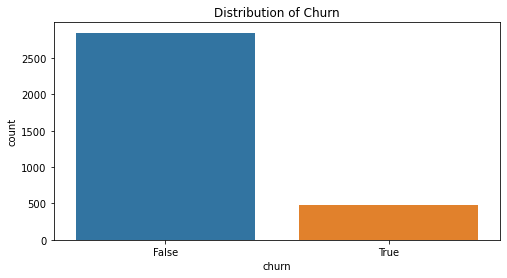

In [18]:
# Distribution of target variable churn

# Count of target variable
print(data["churn"].value_counts())

# Percentage of target variable
print(data["churn"].value_counts(normalize = True) * 100)

# Visualize the target variable distribution
plt.figure(figsize = (8, 4))
sns.countplot(x = "churn", data = data)
plt.title("Distribution of Churn")
plt.show()

2850 customers did not churn accounting to 85.5 %, while 483 customers left accounting to 14.5%. This shows the data is imbalanced, with fewer churned customers compared to non-churned ones.

International plan distribution

no     3010
yes     323
Name: international_plan, dtype: int64
no     90.309031
yes     9.690969
Name: international_plan, dtype: float64


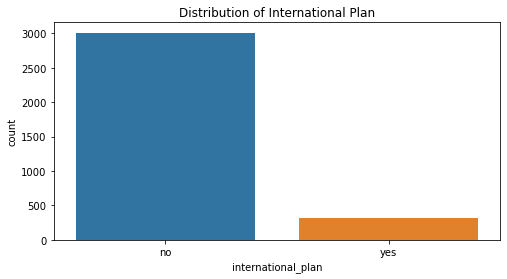

In [19]:
# Distribution of international_plan column
print(data["international_plan"].value_counts())

# Percentage
print(data["international_plan"].value_counts(normalize = True) * 100)


# Visualize
plt.figure(figsize = (8,4))
sns.countplot(x = "international_plan", data = data)
plt.title("Distribution of International Plan")
plt.show()

3010 customers are not subscribed to an international plan while 323 have the international plan.

Voicemail plan distribution

no     2411
yes     922
Name: voice_mail_plan, dtype: int64
no     72.337234
yes    27.662766
Name: voice_mail_plan, dtype: float64


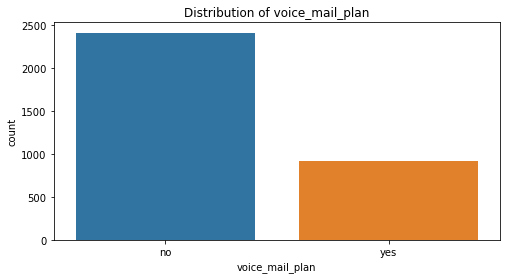

In [20]:
# Distribution of voice_mail_plan
print(data["voice_mail_plan"].value_counts())

# Percentage
print(data["voice_mail_plan"].value_counts(normalize = True) * 100)

# Visualize
plt.figure(figsize = (8,4))
sns.countplot(x = "voice_mail_plan", data = data)
plt.title("Distribution of voice_mail_plan")
plt.show()

72% of customers do not have voicemail plan. 28% have a voice mail plan.

Area code distribution

415    1655
510     840
408     838
Name: area_code, dtype: int64
415    49.654965
510    25.202520
408    25.142514
Name: area_code, dtype: float64


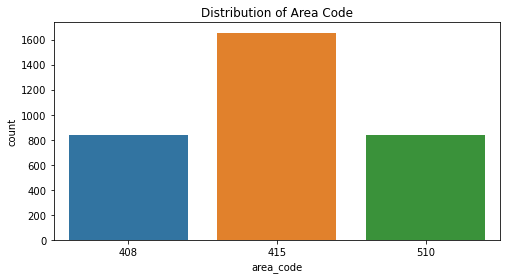

In [21]:
# Distribution of area_code column

print(data["area_code"].value_counts())

# Percentage
print(data["area_code"].value_counts(normalize = True) * 100)

# Visualize
plt.figure(figsize = (8, 4))
sns.countplot(x = "area_code", data = data)
plt.title("Distribution of Area Code")
plt.show()

Almost half of the customers are in the 415 area code. The remaining customers are roughly evenly split between 510 and 408.

State distribution

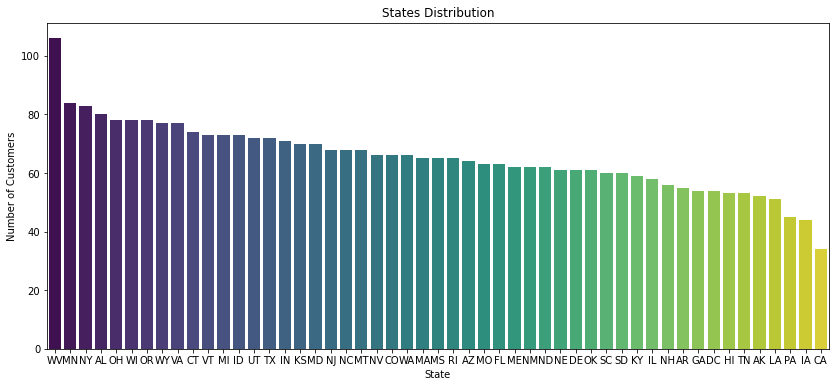

In [22]:
# Distribution of state column

# Get states by count
states = data['state'].value_counts() 

# Visualize
plt.figure(figsize = (14, 6))
sns.barplot(x = states.index, y = states.values, palette = 'viridis', order = states.index)

plt.title("States Distribution")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()

WV has the highest number of customers with 106, making up the largest share in this group. MN, NY, AL, and OR follow closely, ranging from 78 to 84 customers.

##### 3.2.1.2 Univariate analysis for numerical columns

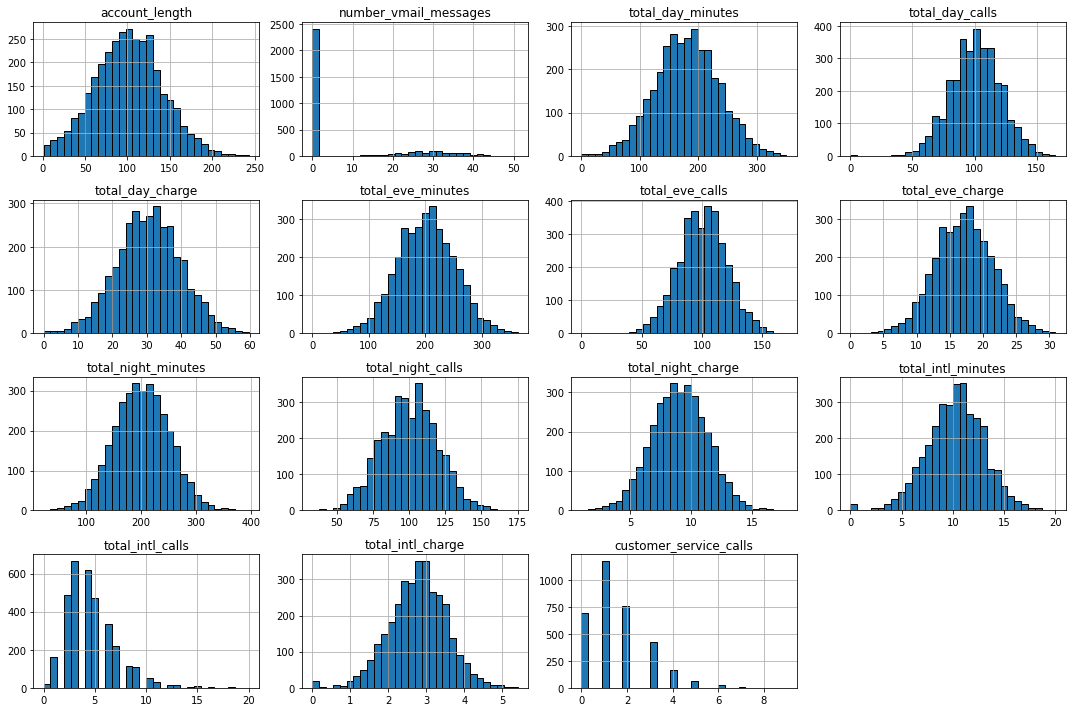

In [23]:
# Plot histograms only for numeric columns
data.select_dtypes(include = 'number').hist(bins = 30, figsize = (15, 10), edgecolor = 'black')
plt.tight_layout()
plt.show()

Most features, including account length, total calls,total minutes, and total charges, show a normal distribution.

#### 3.2.2 Bivariate Analysis

Bivariate analysis examines the relationship between two variables to see how one may affect or relate to the other. In our case, the main focus will be how other variables relate to churn.

**Churn vs Customer service calls**

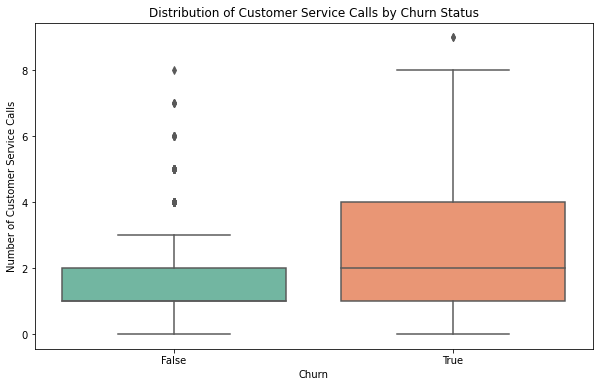

In [24]:
# Churn vs Customer service calls 

plt.figure(figsize = (10, 6))
sns.boxplot(data = data, x = 'churn', y = 'customer_service_calls', palette = 'Set2')
plt.title('Distribution of Customer Service Calls by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')

plt.show()

Customers who churn tend to have made more customer service calls compared to those who stay.

**Account length vs Churn**

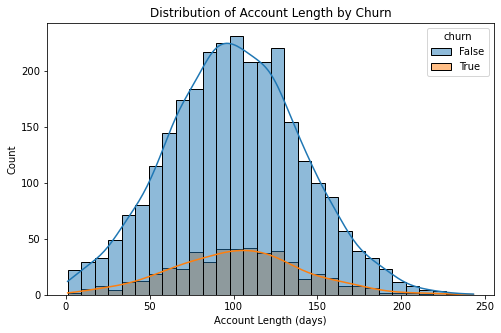

In [25]:
#histogram to show the distribution of account length by churn
plt.figure(figsize = (8,5))
sns.histplot(data = data, x = 'account_length', hue = 'churn', kde = True, bins = 30)
plt.title("Distribution of Account Length by Churn")
plt.xlabel("Account Length (days)")
plt.ylabel("Count")
plt.show()

Both churners (orange) and non-churners (blue) follow a bell-shaped distribution. Churn is more common among newer and mid tenure customers, while long tenure customers are less likely to churn.

**International and voicemail plan vs Churn**

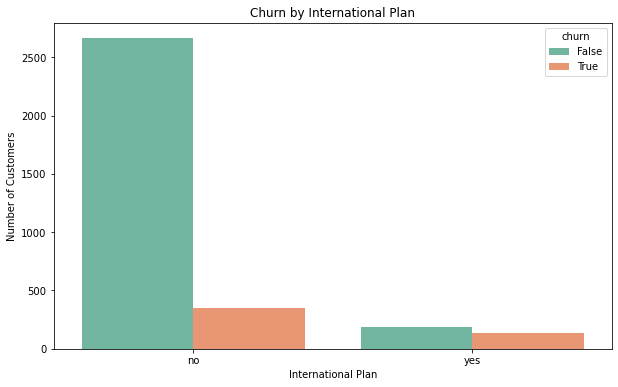

In [26]:
# Plot to show international plan and churn

plt.figure(figsize = (10,6))
sns.countplot(x = 'international_plan', hue = data['churn'].astype(str), data = data, palette = 'Set2')
plt.title("Churn by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.show()

Most customers do not choose to subscribe to international plans. But those who do, are less likely to churn.

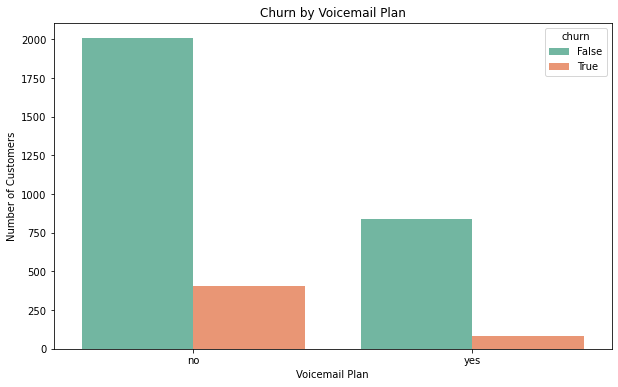

In [27]:
# Bar plot to show voicemail plan and churn
plt.figure(figsize = (10, 6))
sns.countplot(x = 'voice_mail_plan', hue = data['churn'].astype(str), data = data, palette = 'Set2')
plt.title("Churn by Voicemail Plan")
plt.xlabel("Voicemail Plan")
plt.ylabel("Number of Customers")
plt.show();

Customers who have subscribed to voicemail plans are less likely to churn.

**Churn vs charges**

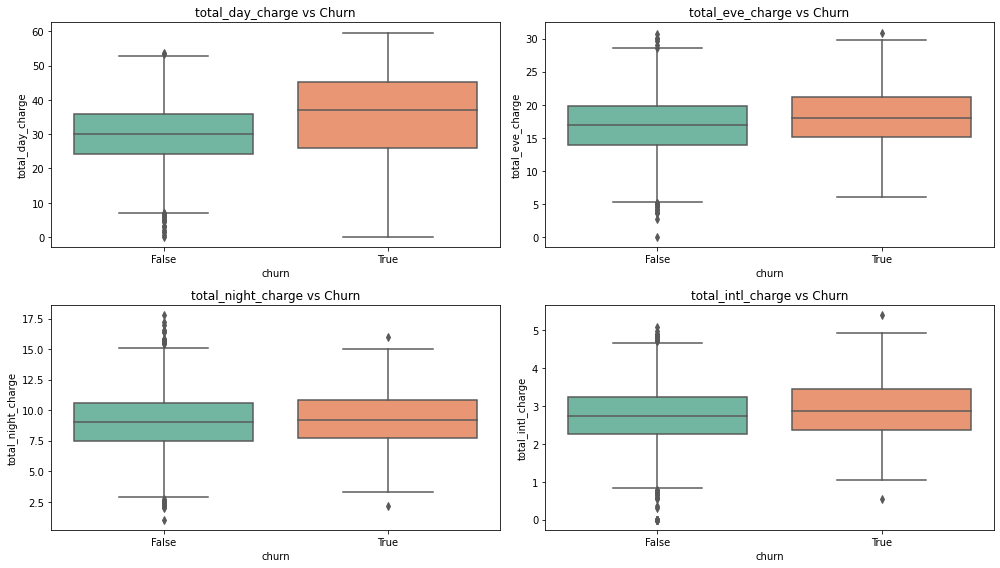

In [28]:
# Box plots to show charges vs churn
charge_features = ["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"]

plt.figure(figsize = (14,8))
for i, col in enumerate(charge_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x = "churn", y = col, data = data, palette = "Set2")
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

The total day charge shows that most customers that have high spending churn.

#### 3.2.3 Multivariate analysis
This involves a multivariate analysis examining relationships between multiple variables simultaneously.

**Correlation Heatmap**

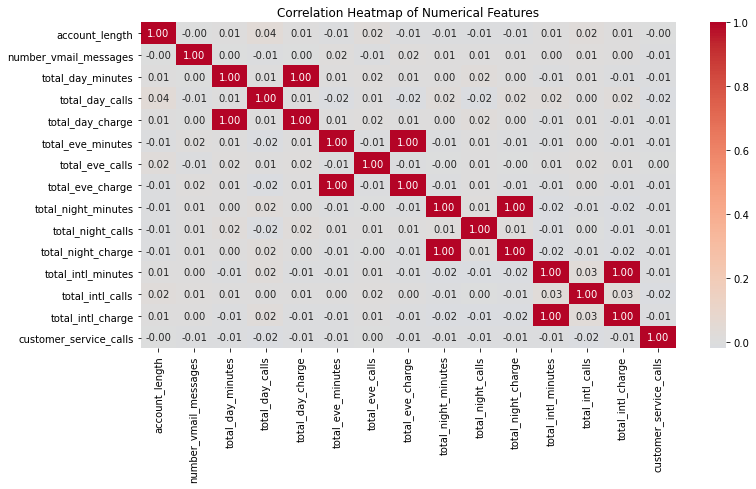

In [29]:
numeric_data = data.select_dtypes(include = ["number"])  
plt.figure(figsize = (12, 6))
sns.heatmap(numeric_data.corr(), annot = True, cmap = "coolwarm", center = 0, fmt = ".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Features like `total_day_minutes` and `total_day_charge` are highly correlated, which is expected since charges depend on usage. Similar patterns exist for evening and night minutes vs charges. This indicates multicollinearity.

### 3.3 Handling Multicollinearity

From the heatmap, we can see some features are highly correlated hence the need to handle them.

In [30]:
# Drop highly correlated features
corr_matrix = data.corr().abs()

# Create mask and get upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

# Find columns with high correlation
to_drop = tri_df.columns[tri_df.max() > 0.90].tolist()

# Drop features and print result
data = data.drop(to_drop, axis = 1)
print("The reduced dataframe has {} columns.".format(data.shape[1]))
print("Dropped columns:", to_drop)

The reduced dataframe has 16 columns.
Dropped columns: ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']


In [31]:
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

### 3.4 Handling outliers

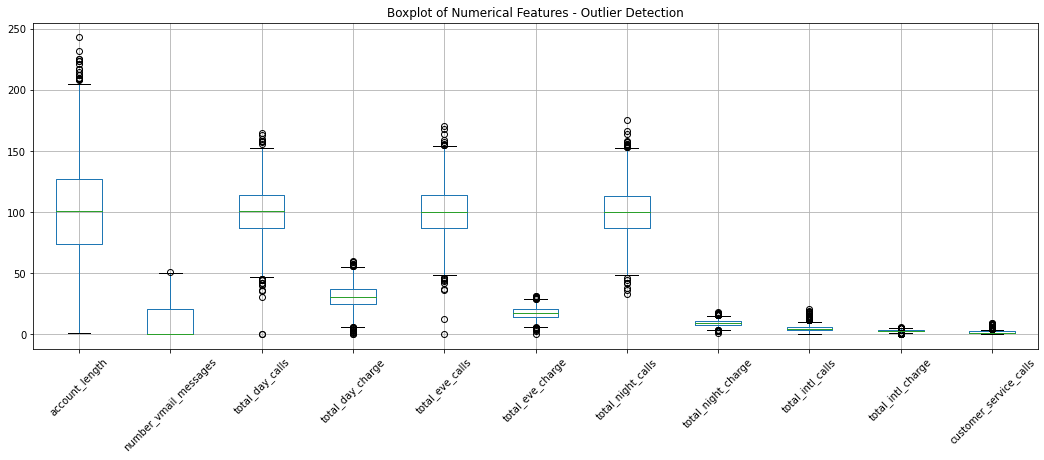

In [32]:
# Visualize outliers for numerical features

numerical_features = data.select_dtypes(include = ["int64", "float64"]).columns
plt.figure(figsize = (18, 6))
data[numerical_features].boxplot()
plt.title("Boxplot of Numerical Features - Outlier Detection")
plt.xticks(rotation = 45)
plt.show()

Outliers were retained as they reflect genuine customer behaviors that may be strong indicators of churn.

### 3.5 Data Preprocessing

#### 3.5.1 Data splitting
W begin by splitting data to separate Features (X) and Target (y). 

In [33]:
# Separate the target from the features
X = data.drop('churn', axis = 1) 
y = data['churn'] 

# Confirm the shapes 
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (3333, 15)
Shape of target (y): (3333,)


#### 3.5.2 Train-Test Split

We now split the data into training and testing sets. The model will be trained on the X_train/y_train set and evaluated on the unseen X_test/y_test set to check its generalization performance. We use stratification to ensure the class distribution of the target variable is preserved in both sets.

In [34]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#### 3.5.3 One-Hot Encoding 
One-hot encoding is a method to convert categorical data into a numeric format that machine learning models can use.

In this section, we will perform one-hot encoding on the following columns: `state`, `area_code`, `international_plan`, and `voice_mail_plan`.

In [35]:
# Categorical columns
categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# Initialize the OneHotEncoder
ohe_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

# Fit the encoder on the Training data's categorical columns
ohe_encoder.fit(X_train[categorical_cols])

# Transform the training data
X_train_ohe = ohe_encoder.transform(X_train[categorical_cols])

# Convert the output to a DataFrame.
feature_names = ohe_encoder.get_feature_names(categorical_cols) 
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns = feature_names, index = X_train.index)

In [36]:
# Transform the Test data 
X_test_ohe = ohe_encoder.transform(X_test[categorical_cols])
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns = feature_names, index = X_test.index) 

print(f"Shape of encoded training features: {X_train_ohe_df.shape}")
print(f"Shape of encoded test features: {X_test_ohe_df.shape}")

Shape of encoded training features: (2666, 58)
Shape of encoded test features: (667, 58)


#### 3.5.4 Scaling Numerical Features
Features on different scales can bias certain models. We standardize our numerical features to have a mean of 0 and a standard deviation of 1. The StandardScaler is fit on the training data and then used to transform both sets, preventing data leakage from the test set.

In [37]:
# Scale Numerical Features
numerical_cols = ['account_length', 'number_vmail_messages', 'total_day_calls', 
                  'total_day_charge', 'total_eve_calls', 'total_eve_charge', 
                  'total_night_calls', 'total_night_charge', 'total_intl_calls', 
                  'total_intl_charge', 'customer_service_calls']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the Training data's numerical columns
scaler.fit(X_train[numerical_cols])

# Transform the Training data
X_train_scaled = scaler.transform(X_train[numerical_cols])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = numerical_cols, index = X_train.index)

# Transform the Test data 
X_test_scaled = scaler.transform(X_test[numerical_cols])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = numerical_cols, index = X_test.index)

print(f"Shape of scaled training numerical features: {X_train_scaled_df.shape}")
print(f"Shape of scaled test numerical features: {X_test_scaled_df.shape}")



Shape of scaled training numerical features: (2666, 11)
Shape of scaled test numerical features: (667, 11)


In [38]:
# Save the modified DataFrame to a new csv file
data.to_csv("encoded.csv", index = False)


#### 3.5.5 Combining Processed Features
After processing the categorical and numerical features separately, we combine them back into final training and test datasets by dropping the original columns and joining the new preprocessed DataFrames.

In [39]:
# Drop the original categorical and numerical columns from the original X_train
X_train_full = X_train.drop(columns=categorical_cols + numerical_cols)

# Join the new processed DataFrames
X_train_full = X_train_full.join([X_train_scaled_df, X_train_ohe_df])

# Drop the original categorical and numerical columns from the original X_test
X_test_full = X_test.drop(columns = categorical_cols + numerical_cols)
X_test_full = X_test_full.join([X_test_scaled_df, X_test_ohe_df])

print(f"Final training shape: {X_train_full.shape}")
print(f"Final test shape: {X_test_full.shape}")


Final training shape: (2666, 69)
Final test shape: (667, 69)


#### 3.5.6 Handling Class Imbalance

SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used to address the class imbalance problem in datasets. Our target variable `churn`, is imbalanced. We use SMOTE to synthetically generate examples for the minority class (customers who churned) only on the training data. 

In [40]:

print(f"Before SMOTE, class distribution in y_train: \n{pd.Series(y_train).value_counts()}")

# Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply SMOTE 
X_train_final, y_train_final = smote.fit_resample(X_train_full, y_train)

print(f"\nAfter SMOTE, class distribution in y_train_final: \n{pd.Series(y_train_final).value_counts()}")
print(f"New shape of X_train_final: {X_train_final.shape}")

Before SMOTE, class distribution in y_train: 
False    2280
True      386
Name: churn, dtype: int64

After SMOTE, class distribution in y_train_final: 
True     2280
False    2280
Name: churn, dtype: int64
New shape of X_train_final: (4560, 69)


## 4.0  MODELLING
At this stage, we apply machine learning algorithms to predict customer churn. Since our target variable `churn`, has two possible values (False for no churn and True for churn), this is a binary classification task.

We will train and evaluate several classification models, starting with Logistic Regression and then exploring more  models like Decision Trees, Random Forest, and KNN Neighbors to compare their performance in predicting customer churn.

Model performance will be evaluated using a various key metrics: Accuracy, Precision, Recall, F1-Score, and Confusion Matrices. The primary business goal is to build a model that can accurately identify customers at high risk of churning.

### 4.1 Logistic Regression

This is an interpretable machine learning algorithm that is commonly used for binary classification tasks. This will be our baseline model to establish a performance benchmark.

In [41]:
# Initialize the Logistic Regression model.
logistic_model = LogisticRegression(random_state = 42, max_iter = 1000)

# Fit the model on the preprocessed training data
logistic_model.fit(X_train_final, y_train_final)

LogisticRegression(max_iter=1000, random_state=42)

In [42]:
# Make predictions on the preprocessed test set
y_pred = logistic_model.predict(X_test_full)

We now evaluate the performance of our baseline Logistic Regression model on the unseen test data.

In [43]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.76      0.84       570
        True       0.33      0.69      0.45        97

    accuracy                           0.75       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.85      0.75      0.78       667



This model demonstrates precision-recall trade-off. It correctly identifies 69% of all churning customers (recall) but at the cost of only 33% of its positive predictions being correct (precision). Its overall accuracy is 75% meaning the model is learning to predict the majority class.

The confusion matrix will provide a clear visual breakdown of the model's predictions versus the actual outcomes, giving us insight into the types of errors it is making.

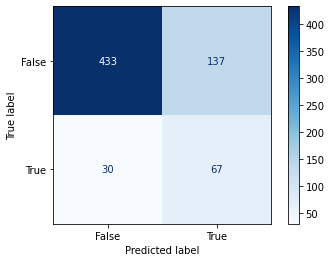

In [44]:
# Confusion Matrix
log_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = logistic_model.classes_)
disp.plot(cmap = plt.cm.Blues);

True Negatives (Top Left): 433 customers who did not churn were correctly predicted.

False Positives (Top Right): 137 customers who did not churn were incorrectly predicted as churned.

False Negatives (Bottom Left): 30 customers who did churn were missed by the model and predicted to stay. 

True Positives (Bottom Right): 67 customers who did churn were correctly identified.

### 4.2 Random Forest

It is an ensemble learning method that combines multiple decision trees to make more accurate predictions.

In [45]:
# Initialize the Random Forest Model
rf_model = RandomForestClassifier(random_state = 42)

# Fit the model
rf_model.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [46]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_full)

We now evaluate the performance of Random Forest classifier model on the unseen test data.

In [47]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95       570
        True       0.76      0.65      0.70        97

    accuracy                           0.92       667
   macro avg       0.85      0.81      0.83       667
weighted avg       0.92      0.92      0.92       667



The model is now highly reliable when it predicts churn. 76% of its customer churn predictions are correct, a massive improvement from the baseline's 33%. The model successfully catches 65% of all customers who did churn. While slightly lower than the baseline's recall, this is a strong result given the large gain in precision.

The confusion matrix will provide a clear visual breakdown of the model's predictions versus the actual outcomes, giving us insight into the types of errors it is making.

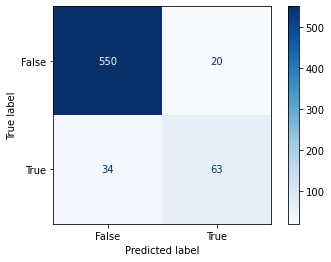

In [48]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = rf_model.classes_)
disp.plot(cmap = plt.cm.Blues);

Top-left (550) True Negatives - Customers who did not churn and model predicted not churn.

Top-right (20) False Positives - Customers who did not churn but model predicted churn.

Bottom-left (34) False Negatives - Customers who actually churned but model predicted not churn.

Bottom-right (63) True Positives - Customers who churned and model correctly predicted churn.

### 4.3 Decision Tree

This is a non-parametric supervised learning algorithm used for both classification and regression.

In [49]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train_final, y_train_final)

DecisionTreeClassifier(random_state=42)

In [50]:
# Make predictions
y_pred_dt = dt_model.predict(X_test_full)

We now evaluate the performance of Decision Tree model on the unseen test data.

In [51]:
# Classification report
print("\n Classification Report:\n", classification_report(y_test, y_pred_dt))


 Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.89      0.91       570
        True       0.50      0.62      0.55        97

    accuracy                           0.85       667
   macro avg       0.71      0.76      0.73       667
weighted avg       0.87      0.85      0.86       667



The overall accuracy of 85% is good but misleading, as it is heavily influenced by good performance on the larger class. When it predicts that a customer will churn, it is only correct half the time. The model manages to catch a reasonable portion (62%) of all true churners.

We visualize the confusion matrix

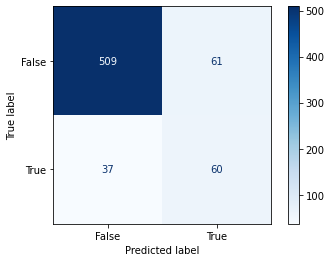

In [52]:
# Confusion Matrix
dt_cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix = dt_cm, display_labels = dt_model.classes_)
disp.plot(cmap = plt.cm.Blues);

Top-left (509) True Negatives - Customers who did not churn and model predicted not churn.

Top-right (61) False Positives - Customers who did not churn but model predicted churn.

Bottom-left (37) False Negatives - Customers who actually churned but model predicted not churn.

Bottom-right (60) True Positives - Customers who churned and model correctly predicted churn.

### 4.4 K-Nearest Neighbors

K-Nearest Neighbors is a non-parametric learning algorithm used for classification and regression. It classifies a data point based on how its nearest neighbors in the training data are classified.

In [53]:
# KNN Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train_final, y_train_final)

KNeighborsClassifier()

In [54]:
#  Predict on test data
y_pred_knn = knn_model.predict(X_test_full)

We now evaluate the performance of KNN model on the unseen test data.

In [55]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.76      0.84       570
        True       0.33      0.69      0.45        97

    accuracy                           0.75       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.85      0.75      0.78       667



The K-Nearest Neighbors model demonstrates a performance almost identical to our initial Logistic Regression baseline. When it predicts a customer will churn, it is only correct 33% of the time. This means 2 out of every 3 alarms are false alarms, making it highly inefficient for targeted campaigns. The model successfully catches 69% of all customers who did churn.

Visualize the confusion matrix

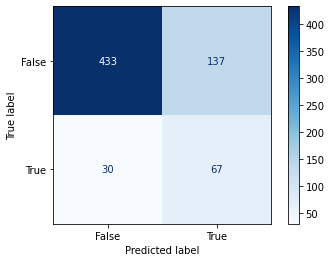

In [56]:
# Confusion Matrix
knn_cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = knn_cm, display_labels = knn_model.classes_)
disp.plot(cmap = plt.cm.Blues);

Top-left (433) True Negatives - Customers who did not churn and model predicted not churn.

Top-right (137) False Positives - Customers who did not churn but model predicted churn.

Bottom-left (30) False Negatives - Customers who actually churned but model predicted not churn.

Bottom-right (67) True Positives - Customers who churned and model correctly predicted churn.

## 5.0 EVALUATION

We assess how well each model performs against the others and determine which one best meets the core business objective to accurately identify customers at high risk of churning so that proactive retention strategies can be implemented efficiently.


### 5.1 Model comparison on Key metrics

 Accuracy alone is misleading due to the class imbalance therefore, we focus on Precision, Recall, and the F1-Score for the positive class, as these directly measure the effectiveness of a retention.

In [57]:
# Evaluate the models based on key metrics
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "KNN": knn_model
}

# Evaluate models
results = []
for name, model in models.items():
    y_pred = model.predict(X_test_full)  
    results.append([name,
        round(accuracy_score(y_test, y_pred) * 100, 2),
        round(precision_score(y_test, y_pred) * 100, 2),
        round(recall_score(y_test, y_pred) * 100, 2),
        round(f1_score(y_test, y_pred) * 100, 2)])

# Put into DataFrame
results_df = pd.DataFrame(results, columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     74.96      32.84   69.07     44.52
1        Random Forest     91.90      75.90   64.95     70.00
2        Decision Tree     85.31      49.59   61.86     55.05
3                  KNN     74.96      32.84   69.07     44.52


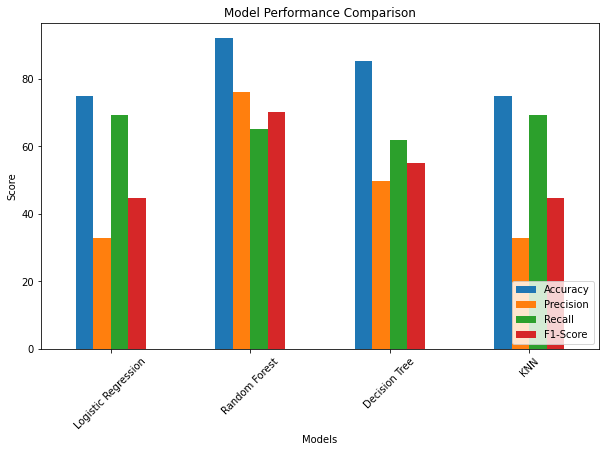

In [58]:
# Visualize the model performance
import matplotlib.pyplot as plt
results_plot = results_df.set_index("Model")
results_plot.plot(kind = "bar", figsize = (10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation = 45)
plt.legend(loc = "lower right")
plt.savefig('Images/metrics.png', dpi=300, bbox_inches='tight')
plt.show()

Random Forest achieved the best performance with 91.9% accuracy and an F1-score of 70%. This suggests it is the most effective model for predicting churn in our dataset. Decision Tree performed moderately, while Logistic Regression and KNN struggled with low precision, making them less suitable for deployment.

### 5.2 Model comparisons - ROC Curve

While precision, recall, and F1-score evaluate model performance at a specific threshold, the Receiver Operating Characteristic (ROC) curve evaluates the performance across all possible classification thresholds. The Area Under the Curve (AUC) score provides a single measure of the model's ability to distinguish between classes, with a score of 1.0 representing a perfect model and 0.5 representing a model no better than random guessing.

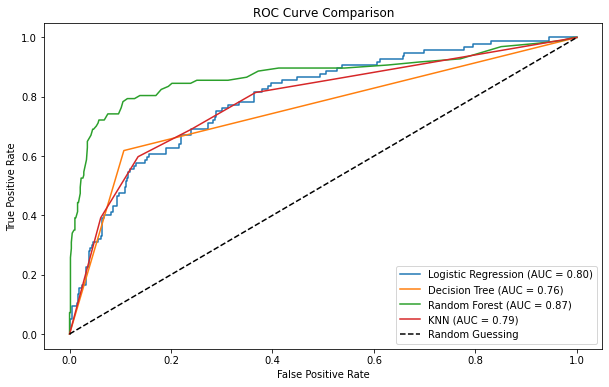

In [59]:
# Get predicted probabilities for ROC curve
y_prob_lr = logistic_model.predict_proba(X_test_full)[:,1]
y_prob_tree = dt_model.predict_proba(X_test_full)[:,1]
y_prob_forest = rf_model.predict_proba(X_test_full)[:,1]
y_prob_knn = knn_model.predict_proba(X_test_full)[:,1]

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# Plot ROC curves
plt.figure(figsize = (10,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_tree):.2f})")
plt.plot(fpr_forest, tpr_forest, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_forest):.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_score(y_test, y_prob_knn):.2f})")


# Add line for random guessing
plt.plot([0,1], [0,1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.savefig('Images/roc.png', dpi=300, bbox_inches='tight')
plt.show()

A better model will have a curve that closely follows the upper-left corner, indicating high true positive rate and low false positive rate. In our case, the Random Forest classifier is the best performing model, as its ROC curve is closest to the top left and an AUC of 0.87, indicating strong discrimination between churners and non-churners.

### 5.3 Hyperparameter Tuning of Random Forest Classifier

To improve our Random Forest model, we used GridSearchCV with 3-fold cross-validation to try different combinations of hyperparameters and find the most effective model parameters for our dataset.

In [60]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]}

rf = RandomForestClassifier(random_state = 42) # Initialize model

# Grid search with cross-validation
rf_search = GridSearchCV(estimator = rf,param_grid = param_grid, cv = 3, scoring = "recall", n_jobs = -1, verbose = 2)

rf_search.fit(X_train_full, y_train)  # Fit on training data

# Best parameters
print("Best Parameters:", rf_search.best_params_)



Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   15.4s finished


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


After the search completed, the output is a  set of hyperparameters that we will use to train on our final random forest model.

The final Random Forest model will be  trained using these hyperparameters and evaluated on the test set.

In [61]:
# Train model
rf_model_final = rf_search.best_estimator_

# Evaluate on train & test
y_train_pred = rf_model_final.predict(X_train_full)
y_test_pred = rf_model_final.predict(X_test_full) 


Having optimized  our Random Forest model, we now would like to know the  features that makes a customer  churn. 

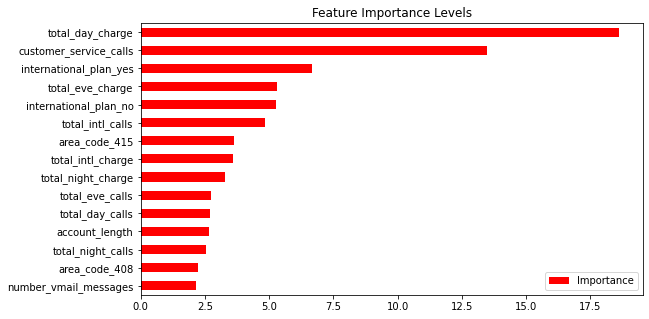

In [62]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_ * 100}, index=X_train_full.columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).tail(15).plot(kind="barh", color="r", figsize=(9, 5))
plt.title("Feature Importance Levels")
plt.savefig('Images/features.png', dpi=300, bbox_inches='tight')
plt.show()

The most influential features in predicting customer churn are total day charges, customer service calls, and having an international plan. These are followed by total evening charges, indicating that high usage and service interactions are key drivers of churn. Focusing on these factors can help the company target at-risk customers effectively.

In [63]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.95      0.95      0.95       570
        True       0.69      0.71      0.70        97

    accuracy                           0.91       667
   macro avg       0.82      0.83      0.82       667
weighted avg       0.91      0.91      0.91       667



The model catches 71% of churners while maintaining reasonable precision. This will save significantly more revenue for Syriatel while keeping false alarms manageable.

The optimized confusion matrix

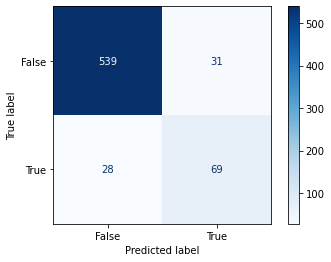

In [64]:
cm_rf_final = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf_final, display_labels = rf_model_final.classes_)
disp.plot(cmap = plt.cm.Blues);

Top-Left (539): True Negatives - The model correctly predicted 539 customers would not churn.

Top-Right (31): False Positives - The model incorrectly predicted 31 customers would churn when they actually did not.

Bottom-Left (28): False Negatives - The model incorrectly predicted 28 customers would not churn when they actually did.

Bottom-Right (69): True Positives - The model correctly predicted 69 customers would churn.

### 5.4 Findings and Recommendations

This analysis has yielded several critical findings about the drivers of customer churn and the performance of predictive models. The following recommendations are designed to translate these data-driven insights into actionable business strategies.

**Key Findings**
1. Model Performance:

 - The Random Forest classifier was identified as the superior model for this task, achieving 91% accuracy and A recall of 71%. This confirms the model is not only highly accurate but also excellent at ranking customers by their risk of churning.

 - The Decision Tree model performed acceptably but was outperformed by Random Forest, highlighting the value of an ensemble approach.

 - Logistic Regression and K-Nearest Neighbor, while the least accurate, provided quickly interpretable coefficients that reinforced the key drivers found by the more complex model, adding confidence to our conclusions.

2. Customer behaviour Insights:

 - Total Day Charge: The strongest predictor, indicating that customers with higher daytime calling costs are at significantly greater risk.

 - Number of Customer Service Calls: A very strong indicator, directly correlating customer frustration and problem escalation with a higher likelihood to churn.

 - International Plan Subscription: Customers with an international plan are a high-risk segment.

 - Total Eve Charge: A contributing factor to  churn risk.

**Recommendations**

Based on these findings, we propose the following data-driven strategies:

1. Deploy the Random Forest Model: Its high accuracy and recall ensures reliable predictions. This allows the retention team to prioritize customers with the highest risk scores.

2. Offer loyalty discounts or personalized plan reviews to high spending customers to ensure they feel they are receiving value.

3. Customer Service Improvement: Focus on customers who contact customer service often. Provide better training for agents and faster issue resolution.

4. For International Plan Subscribers, conduct a competitive analysis of international plans. Proactively communicate with these customers to ensure plan satisfaction and consider value-added perks.



**Limitations & Future Work**

1. Data imbalance: Despite using SMOTE and class weights, the dataset still had fewer churn cases than non-churn, which can limit model generalization.

2. Feature limitations: The dataset did not include customer demographics e.g age, income that could provide a deeper understanding of churn behavior.

3. Model deployment: The project remains at the analysis stage; deploying the model in a real-time environment would be the next practical step.

**Next Steps:**

1. Deploy the Random Forest model into Syriatel’s  system for real-time churn prediction.

2. Use model insights to personalize offers and promotions.

3. Track the effectiveness of retention strategies and refine them based on customer feedback and model updates.

## Conclusion

This project analyzed the SyriaTel customer churn dataset to understand factors driving customer churn and to build a predictive model. After conducting data cleaning and exploratory analysis, key patterns and relationships were identified in usage and service features. A Random Forest classifier was developed and optimized using GridSearchCV, achieving 91% accuracy and a recall of 0.71. Feature importance analysis highlighted Total Day Charges, Customer Service Calls and International Plan as the main drivers of churn. The model reliably identifies most at-risk customers, enabling targeted retention efforts that can reduce revenue loss. Overall, this analysis provides actionable insights and a robust predictive tool to guide business strategies for customer retention.
